# Une régression logistique sur le jeu de données Iris

Petite manip bonus qui n'a rien à voir avec le sujet : afficher une photo d'iris en haut de ce notebook.

<img src="/img/iris-unguicularis.jpg" width="600" />

<img src="img/iris-unguicularis.jpg" width="600" />

## Importer les librairies

Vous aurez besoin de pandas, matplotlib, seaborn (et numpy ?)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Importer les données et commencer à explorer le dataset

In [8]:
iris = datasets.load_iris()

In [10]:
type(iris)

sklearn.utils.Bunch

Ce n'est pas un DataFrame !

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
La liste des espèces

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

les 5 premières lignes

In [14]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
iris_data = iris.data

In [20]:
type(iris_data), iris_data.ndim, iris_data.shape

(numpy.ndarray, 2, (150, 4))

## Analyse de données : visualisation

Faire apparaître sur une même figure (idéalement un même graphique !) la relation entre chaque feature et chaque espèce d'iris.

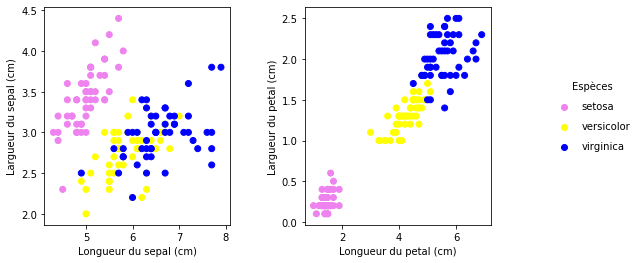

In [22]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in iris.target]

ax1.scatter(iris_data[:, 0], iris_data[:, 1], c=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(iris_data[:, 2], iris_data[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();

In [24]:
sns.set()
df = pd.DataFrame(iris_data, columns=iris['feature_names'] )
df['target'] = iris.target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


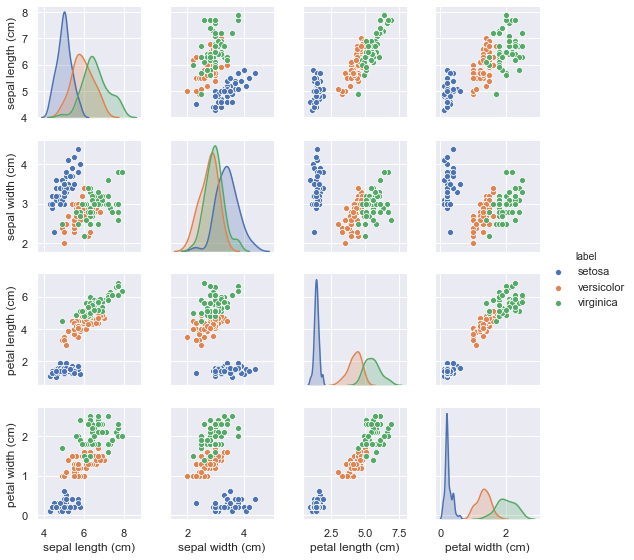

In [25]:
sns.pairplot(df, hue='label', vars=iris['feature_names'], size=2);

## Création d'un train set et test set

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

## Création et entraînement du modèle

## Évaluation du modèle